In [405]:
import warnings
warnings.filterwarnings("ignore")

In [440]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline
import re

plt.rcParams['figure.figsize'] = [20, 5]

df1 = pd.read_csv('../final_data/naver_news_scraping_ranking_0120_0831.csv')
df2 = pd.read_csv('../final_data/Time.csv')

In [441]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20250 entries, 0 to 20249
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  20250 non-null  int64 
 1   date        20250 non-null  int64 
 2   section     20250 non-null  object
 3   title       20250 non-null  object
 4   view        20250 non-null  int64 
dtypes: int64(3), object(2)
memory usage: 791.1+ KB


In [442]:
# 결측치는 앞 행의 값으로 채우겠다!
df2 = df2.fillna(method='ffill')

df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 225 entries, 0 to 224
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   date       225 non-null    object 
 1   time       225 non-null    float64
 2   test       225 non-null    float64
 3   negative   225 non-null    float64
 4   confirmed  225 non-null    float64
 5   released   225 non-null    float64
 6   deceased   225 non-null    float64
dtypes: float64(6), object(1)
memory usage: 12.4+ KB


In [443]:
# df1 조회수를 날짜로 그룹화, 평균 구하기
df1_group = df1.groupby(by=df1['date'], as_index=False).mean()
df1_group

,date,Unnamed: 0,view
0,20200120,44.5,106879.211111
1,20200121,134.5,93059.311111
2,20200122,224.5,99723.633333
3,20200123,314.5,89854.833333
4,20200124,404.5,94341.377778
...,...,...,...
220,20200827,19844.5,188385.877778
221,20200828,19934.5,199629.444444
222,20200829,20024.5,179897.844444
223,20200830,20114.5,160806.788889


In [444]:
# 그룹화 한 데이터 정렬하기
df1_group_sort = df1_group.sort_values('view', ascending=False)
df1_group_sort


,date,Unnamed: 0,view
172,20200710,15524.5,296465.122222
34,20200223,3104.5,269851.222222
171,20200709,15434.5,267124.755556
36,20200225,3284.5,247792.833333
35,20200224,3194.5,229914.733333
...,...,...,...
2,20200122,224.5,99723.633333
5,20200125,494.5,96815.233333
4,20200124,404.5,94341.377778
1,20200121,134.5,93059.311111


In [445]:
# 뉴스 데이터 추출 해 보기
news1 = df1[df1['date'] == 20200710]
print(news1)

       Unnamed: 0      date   section  \
15480       15480  20200710  politics   
15481       15481  20200710  politics   
15482       15482  20200710  politics   
15483       15483  20200710  politics   
15484       15484  20200710  politics   
...           ...       ...       ...   
15565       15565  20200710   Society   
15566       15566  20200710   Society   
15567       15567  20200710   Society   
15568       15568  20200710   Society   
15569       15569  20200710   Society   

                                           title    view  
15480       [단독] 박원순, 실종 당일 정세균에게 "너무 힘들다. 죄송하다"  749700  
15481          "박시장이 성추행 하고 사진을 보냈어요" 前비서 경찰에 고소  629325  
15482            [속보] 박원순 서울시장 숨진 채 발견…실종신고 7시간만  509339  
15483    "XX 자식"···이해찬, 박원순 성추행 의혹 묻자 "예의 없다" 분…  440166  
15484           이해찬 "그걸 예의라고" 박원순 빈소서 기자 노려보며 버럭  421953  
...                                          ...     ...  
15565          영국 있는 박원순 아들 상주역 맡을까…"자가격리 면제 가능"  287933  
15566            [3보] 박원순 서울시장, 북악산

In [446]:
# df2의 날짜 데이터 형식 바꿔주기
df2['re_date'] = df2.date

for i,j in zip(df2['date'],range(len(df2)+1)):
    parse = re.sub('[-=.#/?:$}]', '', i)
    df2['re_date'][j] = parse
df2

,date,time,test,negative,confirmed,released,deceased,re_date
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124
...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830


In [447]:
# 각 날짜의 일일 확진자 수 구하기
df2['confirmed_day'] = 0
df2['confirmed_day'][0] = df2['confirmed'][0]

for i in range(1, len(df2)) :
    df2['confirmed_day'][i] = df2['confirmed'][i] - df2['confirmed'][i-1]
    
df2

,date,time,test,negative,confirmed,released,deceased,re_date,confirmed_day
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120,1
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121,0
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122,0
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123,0
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124,1
...,...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827,441
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828,371
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829,323
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830,299


In [448]:
# df2의 각 날짜에 조회수 평균 값 컬럼 추가하기
df2['view_avg'] = df1_group['view']
df2

,date,time,test,negative,confirmed,released,deceased,re_date,confirmed_day,view_avg
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120,1,106879.211111
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121,0,93059.311111
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122,0,99723.633333
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123,0,89854.833333
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124,1,94341.377778
...,...,...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827,441,188385.877778
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828,371,199629.444444
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829,323,179897.844444
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830,299,160806.788889


<function matplotlib.pyplot.show(*args, **kw)>

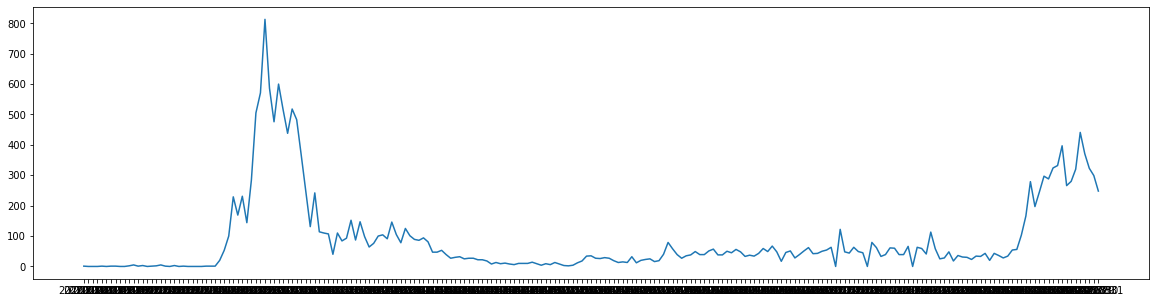

In [449]:
plt.plot(df2['re_date'], df2['confirmed_day'])
plt.show

<function matplotlib.pyplot.show(*args, **kw)>

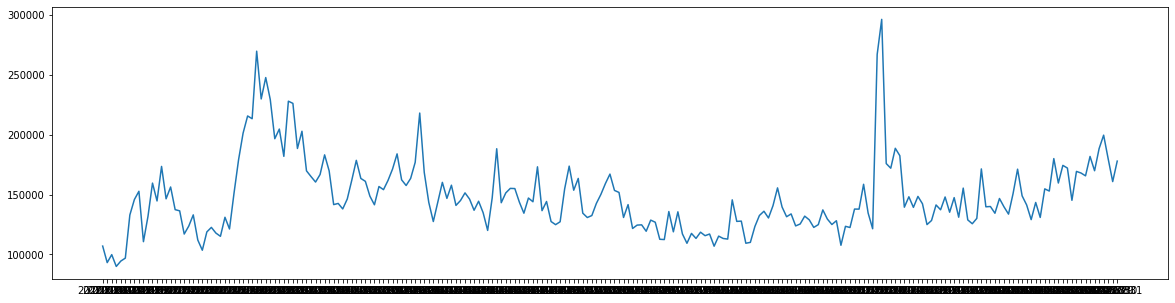

In [450]:
plt.plot(df2['re_date'], df2['view_avg'])
plt.show

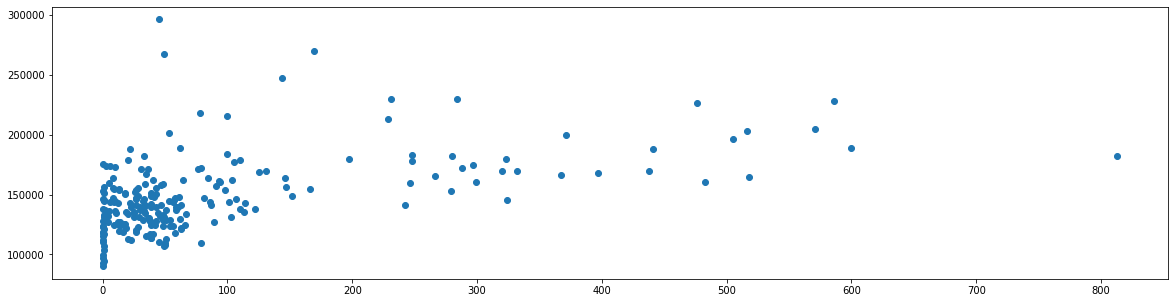

In [451]:
# 일별 확진자와 조회수 평균의 상관관계 구하기
plt.scatter(df2['confirmed_day'], df2['view_avg'])
plt.show()

# 이게 뭘까 대체???
# 뭐지 뭐지 뭘까

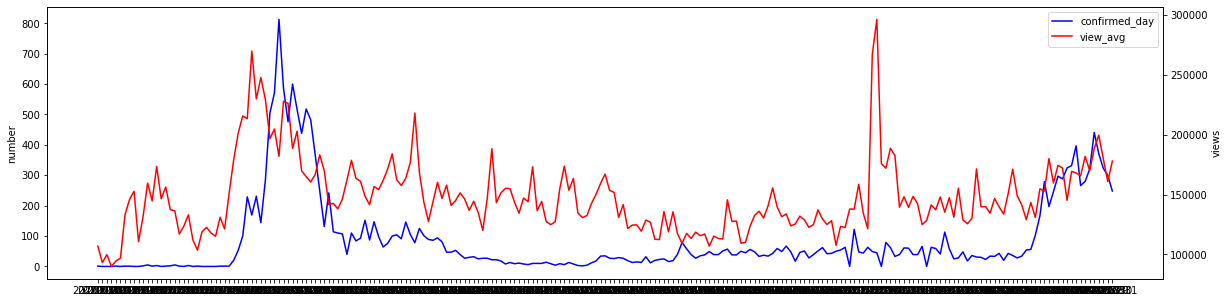

In [452]:
# 두 그래프 한번에 보자!
# 함수화

x = df2['re_date']
y1 = df2['confirmed_day']
y2 = df2['view_avg']

def print_graph(x, y1, y2) :

    fig, ax1 = plt.subplots()
    ax2 = ax1.twinx()

    line1 = ax1.plot(x, y1, color='b', linestyle='-', label='confirmed_day')
    line2 = ax2.plot(x, y2, color='r', linestyle='-', label='view_avg')

    ax1.set_xticklabels(x)
    ax1.set_ylabel('number')
    ax2.set_ylabel('views')

    lines = line1 + line2
    labels = [l.get_label() for l in lines]
    plt.legend(lines, labels)
    plt.show()
    
print_graph(x, y1, y2)

In [453]:
# df2에 월 구분을 위한 컬럼 생성
df2['month'] = 0
for i in range(len(df2)) :
    df2['month'][i] = df2['re_date'][i][4:6]
df2

,date,time,test,negative,confirmed,released,deceased,re_date,confirmed_day,view_avg,month
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120,1,106879.211111,1
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121,0,93059.311111,1
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122,0,99723.633333,1
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123,0,89854.833333,1
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124,1,94341.377778,1
...,...,...,...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827,441,188385.877778,8
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828,371,199629.444444,8
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829,323,179897.844444,8
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830,299,160806.788889,8


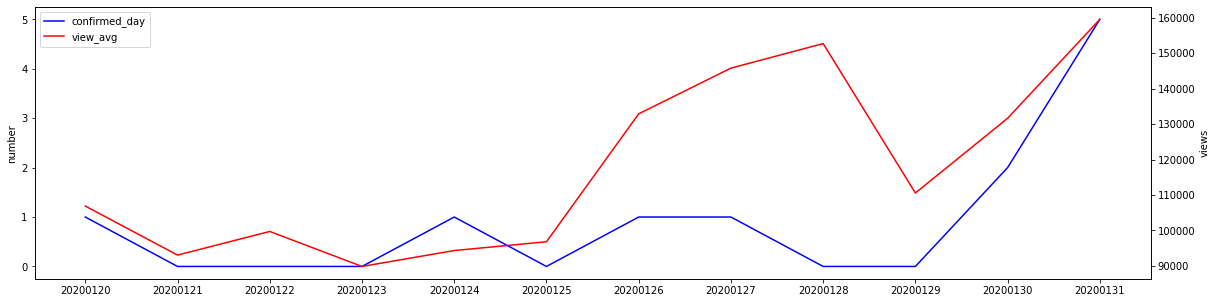

In [454]:
# 월별로 끊어보자
# 1월

x = df2['re_date'].loc[df2['month']==1]
y1 = df2['confirmed_day'].loc[df2['month']==1]
y2 = df2['view_avg'].loc[df2['month']==1]

print_graph(x, y1, y2)

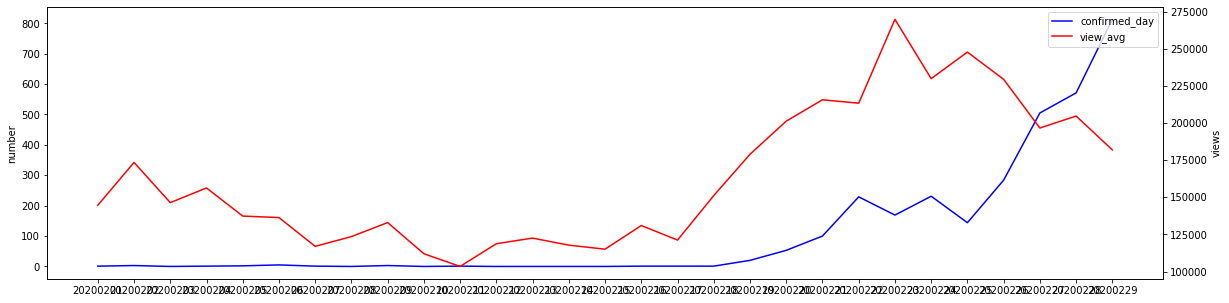

In [455]:
# 월별로 끊어보자
# 2월

x = df2['re_date'].loc[df2['month']==2]
y1 = df2['confirmed_day'].loc[df2['month']==2]
y2 = df2['view_avg'].loc[df2['month']==2]

print_graph(x, y1, y2)

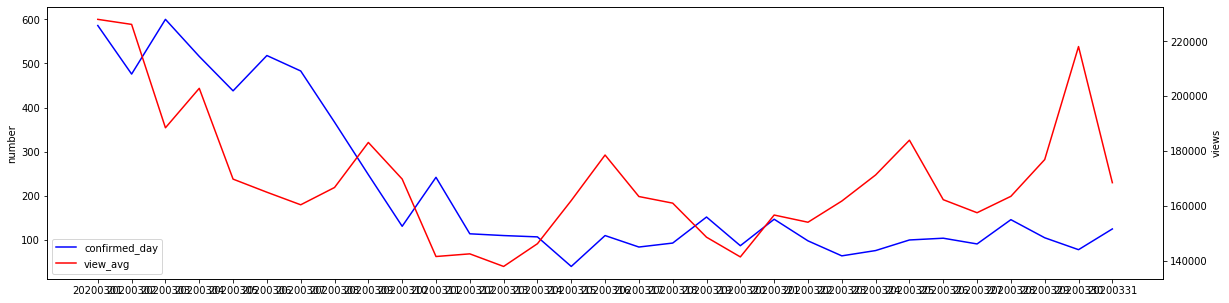

In [456]:
# 월별로 끊어보자
# 3월

x = df2['re_date'].loc[df2['month']==3]
y1 = df2['confirmed_day'].loc[df2['month']==3]
y2 = df2['view_avg'].loc[df2['month']==3]

print_graph(x, y1, y2)

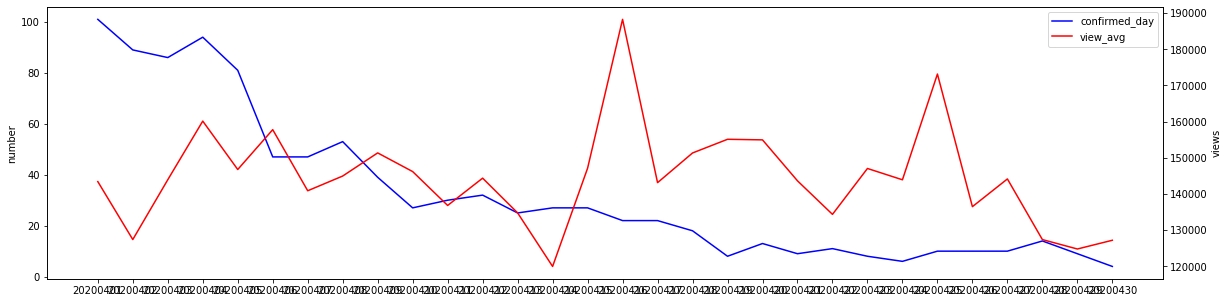

In [457]:
# 월별로 끊어보자
# 4월

x = df2['re_date'].loc[df2['month']==4]
y1 = df2['confirmed_day'].loc[df2['month']==4]
y2 = df2['view_avg'].loc[df2['month']==4]

print_graph(x, y1, y2)

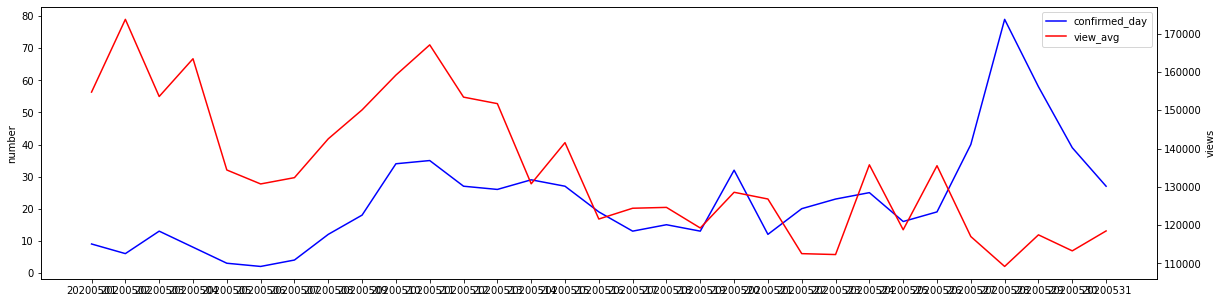

In [458]:
# 월별로 끊어보자
# 5월

x = df2['re_date'].loc[df2['month']==5]
y1 = df2['confirmed_day'].loc[df2['month']==5]
y2 = df2['view_avg'].loc[df2['month']==5]

print_graph(x, y1, y2)

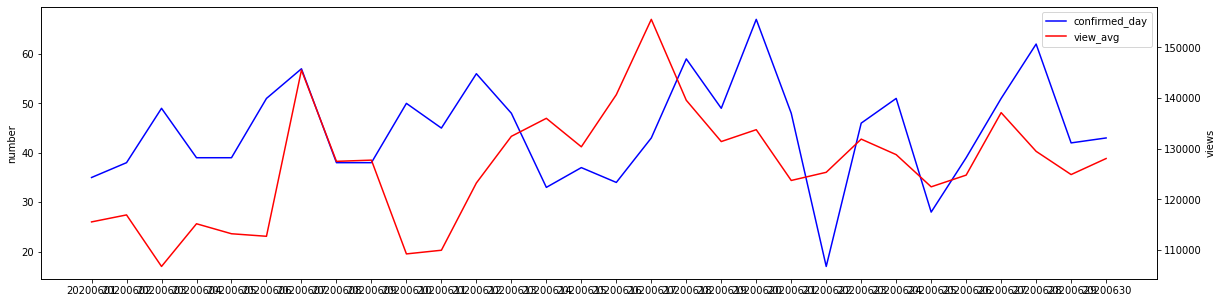

In [459]:
# 월별로 끊어보자
# 6월

x = df2['re_date'].loc[df2['month']==6]
y1 = df2['confirmed_day'].loc[df2['month']==6]
y2 = df2['view_avg'].loc[df2['month']==6]

print_graph(x, y1, y2)

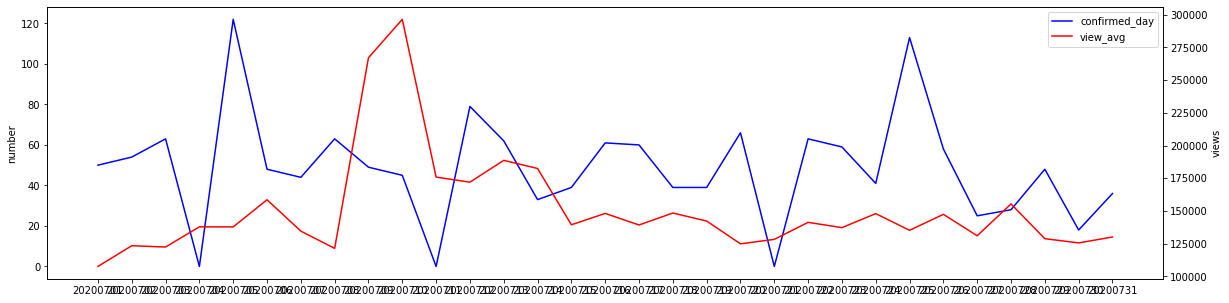

In [460]:
# 월별로 끊어보자
# 7월

x = df2['re_date'].loc[df2['month']==7]
y1 = df2['confirmed_day'].loc[df2['month']==7]
y2 = df2['view_avg'].loc[df2['month']==7]

print_graph(x, y1, y2)

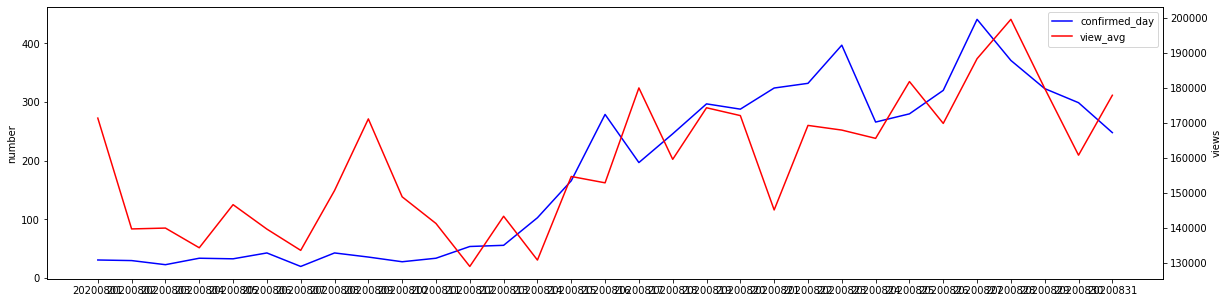

In [461]:
# 월별로 끊어보자
# 8월

x = df2['re_date'].loc[df2['month']==8]
y1 = df2['confirmed_day'].loc[df2['month']==8]
y2 = df2['view_avg'].loc[df2['month']==8]

print_graph(x, y1, y2)

In [462]:
# 랭킹 뉴스의 평균 조회수 순위가 30위까지 날짜 출력해보자

# 상위 30개만 추출하기
df1_group_rank = df1_group_sort[:30]

# 날짜로 정렬하기
df1_group_rank_sort_date = df1_group_rank.sort_values('date', ascending=True)
df1_group_rank_sort_date['date'].values

array([20200219, 20200220, 20200221, 20200222, 20200223, 20200224,
       20200225, 20200226, 20200227, 20200228, 20200229, 20200301,
       20200302, 20200303, 20200304, 20200309, 20200316, 20200325,
       20200330, 20200416, 20200709, 20200710, 20200713, 20200714,
       20200817, 20200825, 20200827, 20200828, 20200829, 20200831],
      dtype=int64)

In [463]:
# 상위 랭크 된 날짜 데이터 판별을 위해 df2에 새로운 컬럼 추가
df2['flag'] = 0
flag_list = df1_group_rank_sort_date['date'].values

for i in range(len(df2)) :
    if int(df2['re_date'][i]) in flag_list :
        df2['flag'][i] = 1
        
df2

,date,time,test,negative,confirmed,released,deceased,re_date,confirmed_day,view_avg,month,flag
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120,1,106879.211111,1,0
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121,0,93059.311111,1,0
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122,0,99723.633333,1,0
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123,0,89854.833333,1,0
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124,1,94341.377778,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827,441,188385.877778,8,1
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828,371,199629.444444,8,1
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829,323,179897.844444,8,1
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830,299,160806.788889,8,0


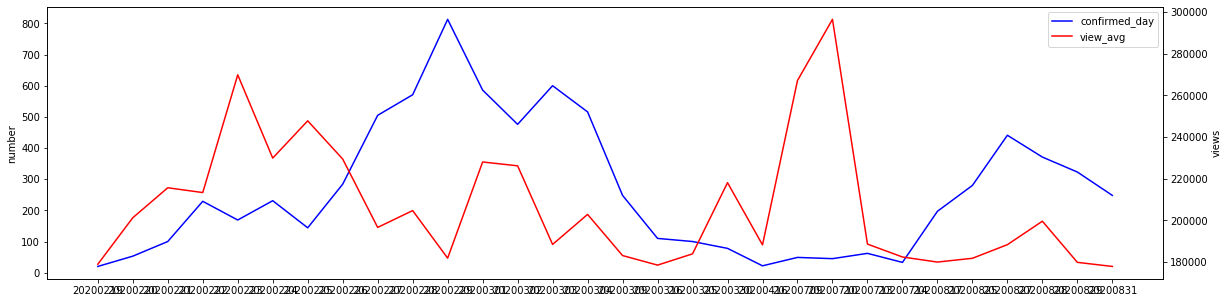

In [464]:
# 상위 30 데이터 그래프 그리기

x = df2['re_date'].loc[df2['flag']==1]
y1 = df2['confirmed_day'].loc[df2['flag']==1]
y2 = df2['view_avg'].loc[df2['flag']==1]

print_graph(x, y1, y2)

In [465]:
# df2에 날짜 구분을 위한 컬럼 생성
df2['day'] = 0
for i in range(len(df2)) :
    df2['day'][i] = df2['re_date'][i][6:8]
df2

,date,time,test,negative,confirmed,released,deceased,re_date,confirmed_day,view_avg,month,flag,day
0,2020-01-20,16.0,1.0,0.0,1.0,0.0,0.0,20200120,1,106879.211111,1,0,20
1,2020-01-21,16.0,1.0,0.0,1.0,0.0,0.0,20200121,0,93059.311111,1,0,21
2,2020-01-22,16.0,4.0,3.0,1.0,0.0,0.0,20200122,0,99723.633333,1,0,22
3,2020-01-23,16.0,22.0,21.0,1.0,0.0,0.0,20200123,0,89854.833333,1,0,23
4,2020-01-24,16.0,27.0,25.0,2.0,0.0,0.0,20200124,1,94341.377778,1,0,24
...,...,...,...,...,...,...,...,...,...,...,...,...,...
220,2020-08-27,0.0,1869579.0,1798832.0,18706.0,14461.0,313.0,20200827,441,188385.877778,8,1,27
221,2020-08-28,0.0,1887717.0,1817929.0,19077.0,14551.0,316.0,20200828,371,199629.444444,8,1,28
222,2020-08-29,0.0,1909329.0,1835883.0,19400.0,14765.0,321.0,20200829,323,179897.844444,8,1,29
223,2020-08-30,0.0,1924170.0,1846450.0,19699.0,14903.0,323.0,20200830,299,160806.788889,8,0,30


In [466]:
# 날짜에 따른 데이터 출력을 위한 데이터 프레임
confirmed = df2.loc[:, ['re_date', 'confirmed_day', 'view_avg']]
confirmed

# 뉴스에 따른 확진자 숫자 양상 변화 함수
def confirmed_num(n):
    for i in range(len(confirmed)-6):
        if confirmed['re_date'][i] == n:
#           print(confirmed.confirmed[i+6]-confirmed.confirmed[i])
            return confirmed['confirmed_day'][i+6] - confirmed['confirmed_day'][i]
            break
            return None
        else:
            continue
            
confirmed_num('20200606')

5

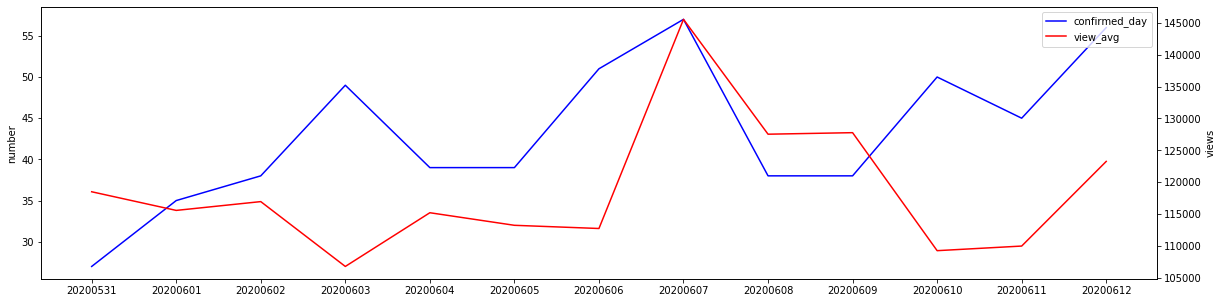

In [467]:
# 특정 날짜를 기준으로 그래프 그리기
# 1. 6월 6일 (그래프는 2주 간격)

# 그 날짜의 인덱스 가져오기
# 앞 뒤 7일 뽑기 위해
day_index = df2[(df2['month']==6) & (df2['day']==6)].index[0]

# 데이터 추출
day_df2 = df2.iloc[day_index-6:day_index+7, :]
day_df2

x = day_df2['re_date']
y1 = day_df2['confirmed_day']
y2 = day_df2['view_avg']

print_graph(x, y1, y2)

In [468]:
# 이 날짜의 뉴스 기사 뽑아보자
day_df1 = df1.loc[(df1['date']==20200606) & (df1['section']=='politics')]
day_df1_sort = day_df1.sort_values('view', ascending=False)
day_df1_sort.iloc[:10, [2, 3]]

,section,title
12420,politics,"文 ""대통령 이후 생각하지 않고, 그냥 대통령으로 끝나고 싶다"""
12421,politics,'文사저 부지' 판 사람은 경남고 2년 후배… 경호처서 매입한 주변…
12422,politics,"北 ""남북연락사무소 폐쇄""…군사적 도발 시사"
12423,politics,집안 남자 4명이 참전용사···엄마는 4번 혼절했다
12424,politics,“비교하면 욕심 끝없어…나이 들어 안 물러나는 건 헛짓”
12425,politics,"[단독] 오세훈 선거 방해한 대진연 2명, 김복동 장학금 받았다"
12426,politics,"""팔 하나 자르고 눈 하나 파주고 간다""던 이탄희의 공황장애 고백"
12427,politics,공황장애 고백한 이탄희 “새벽 2시 식은땀으로 깨어나”
12428,politics,"북 통일전선부 ""갈 데까지 가보잔 결심…김여정, 조치 지시""(종합)"
12429,politics,"""현충일에 천안함 유족 빼려했다니… 5·18 행사에 5·18 유족 안부…"


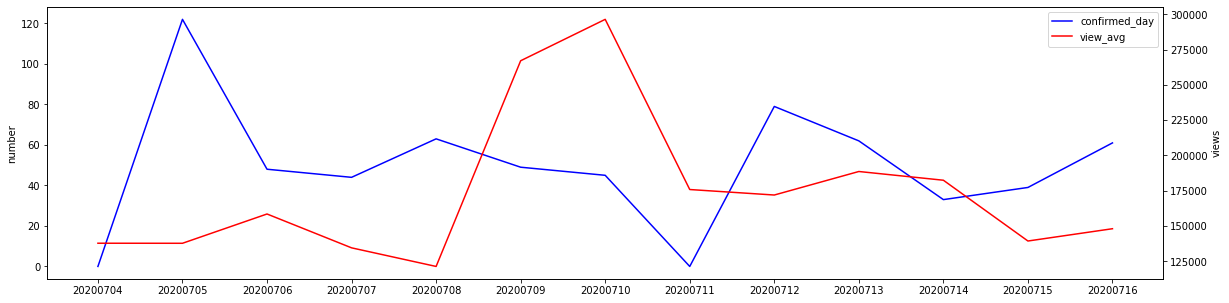

In [469]:
# 특정 날짜를 기준으로 그래프 그리기
# 2. 7월 10일 주택시장 안정보완 대책

# 그 날짜의 인덱스 가져오기
# 앞 뒤 7일 뽑기 위해
day_index = df2[(df2['month']==7) & (df2['day']==10)].index[0]
day_index

# 데이터 추출
day_df2 = df2.iloc[day_index-6:day_index+7, :]
day_df2

x = day_df2['re_date']
y1 = day_df2['confirmed_day']
y2 = day_df2['view_avg']

print_graph(x, y1, y2)

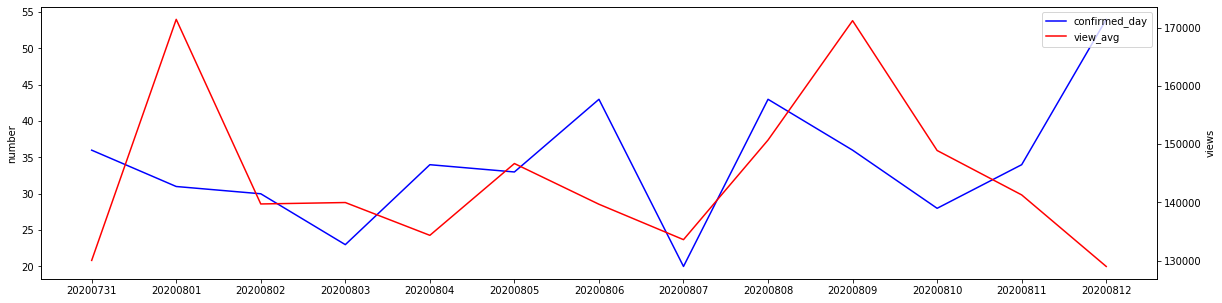

In [470]:
# 특정 날짜를 기준으로 그래프 그리기
# 3. 8월 6일 경상수지 68.8억 달러 흑자

# 그 날짜의 인덱스 가져오기
# 앞 뒤 7일 뽑기 위해
day_index = df2[(df2['month']==8) & (df2['day']==6)].index[0]
day_index

# 데이터 추출
day_df2 = df2.iloc[day_index-6:day_index+7, :]
day_df2

x = day_df2['re_date']
y1 = day_df2['confirmed_day']
y2 = day_df2['view_avg']

print_graph(x, y1, y2)

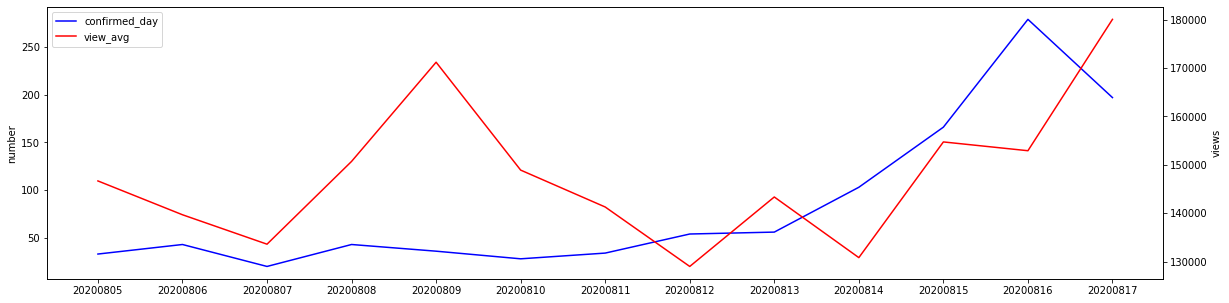

In [471]:
# 특정 날짜를 기준으로 그래프 그리기
# 4. 8월 11일 경제성장률 oecd 2위

# 그 날짜의 인덱스 가져오기
# 앞 뒤 7일 뽑기 위해
day_index = df2[(df2['month']==8) & (df2['day']==11)].index[0]
day_index

# 데이터 추출
day_df2 = df2.iloc[day_index-6:day_index+7, :]
day_df2

x = day_df2['re_date']
y1 = day_df2['confirmed_day']
y2 = day_df2['view_avg']

print_graph(x, y1, y2)

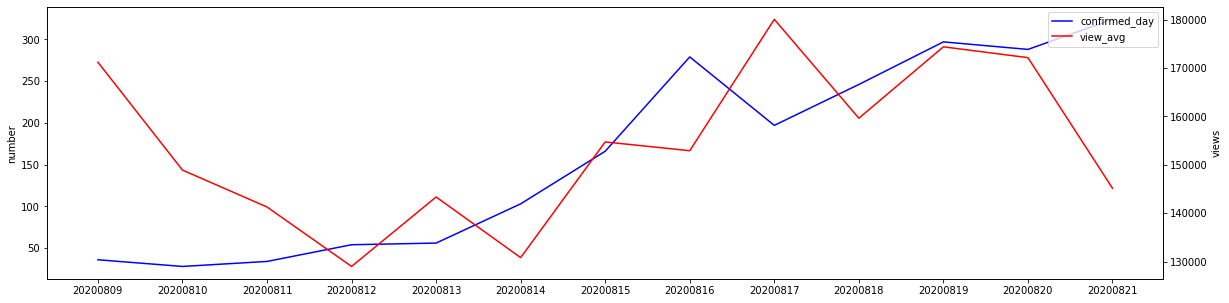

In [472]:
# 특정 날짜를 기준으로 그래프 그리기
# 5. 8월 15일 광화문 집회

# 특정 날짜를 기준으로 그래프 그리기
# 4. 8월 11일 경제성장률 oecd 2위

# 그 날짜의 인덱스 가져오기
# 앞 뒤 7일 뽑기 위해
day_index = df2[(df2['month']==8) & (df2['day']==15)].index[0]
day_index

# 데이터 추출
day_df2 = df2.iloc[day_index-6:day_index+7, :]
day_df2

x = day_df2['re_date']
y1 = day_df2['confirmed_day']
y2 = day_df2['view_avg']

print_graph(x, y1, y2)